# Regression Analysis - 2 - KNN Regression, Decision Tree Regression, Linear Regression

## Import libraries and load dataset

In [1]:
# Dataframe Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#KNN regression Import
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Regression Import
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Linear Regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# MSE, RMSE Calc. Import
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
# Load presaved dataset from seaborn

flt = sns.load_dataset("flights")

## Data Summary

In [3]:
flt.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flt.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [5]:
flt.shape

(144, 3)

In [6]:
flt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


## Data Visualizations

Let's `visualise` the data to understand it better.

### Year-wise Passengers Plot

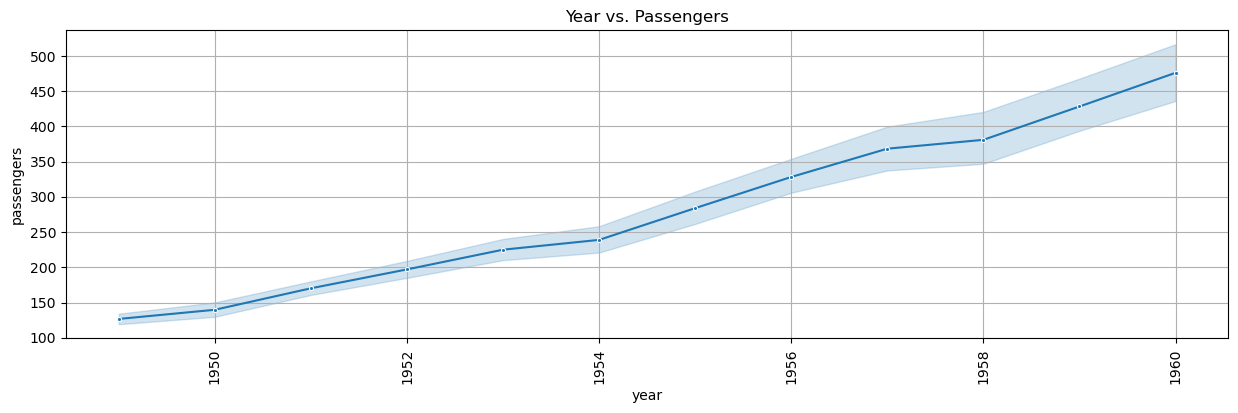

In [7]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='year', y='passengers', data=flt, marker='.')

plt.title('Year vs. Passengers')
plt.xlabel('year')
plt.ylabel('passengers')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Month-wise Passengers Plot over all years

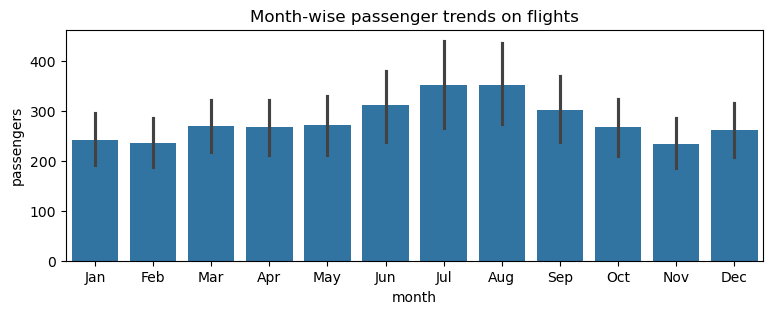

In [8]:
# Month-wise plot
plt.figure(figsize=(9, 3))
sns.barplot(x='month', y='passengers', data=flt)

plt.title('Month-wise passenger trends on flights')
plt.xlabel('month')
plt.ylabel('passengers')
plt.show()

In [9]:
flt.columns

Index(['year', 'month', 'passengers'], dtype='object')

## Basic EDA

Let's analyse the variable, `Year` as a numerical column, as it is. This is because we want to see the change in `passenger count` with year.

## Label Encoding

Let's label encode the column, `month`, to study the trend of passengers across the different months of the year.

In [10]:
flt['month'] = flt.month.astype(str)

In [11]:
labelencoder = LabelEncoder()

# fit the encoder on 'Outlet_Size' 
flt['month'] = labelencoder.fit_transform(flt.month)

# display 10 sample observations
flt.sample(5)

,year,month,passengers
116,1958,11,404
20,1950,11,158
45,1952,10,191
26,1951,7,178
111,1958,0,348


### Missing value treatment

In [12]:
flt.isnull().values.any()

False

In [13]:
missing_values = flt.isnull().sum()
missing_values

year          0
month         0
passengers    0
dtype: int64

***We have ensured that there are no missing values in the dataset.***

### Outlier Treatment

Let's check the outliers on the `passengers` column, as in the others, outliers aren't relevant to domain.

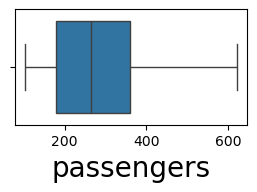

In [14]:
# let's first plot the outliers.
plt.figure(figsize=(3, 1.5))
z = sns.boxplot(x=flt['passengers'], whis=1.5)  # plot the boxplot
z.set_xlabel("passengers", fontsize=20)  # set the x-axis label
plt.show()

**We can observe that there are no outliers in the data.**

## Scaling & Train and Test Split

In [15]:
# select the target variable
Y = flt['passengers']

# select all the independent variables
# by dropping the target variable
X = flt.drop(['passengers'], axis = 1)

### Min-Max Scaling

In [16]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.sample(5)

,0,1
48,0.363636,0.363636
19,0.090909,0.090909
133,1.000000,0.272727
97,0.727273,0.272727
5,0.000000,0.545455


In [17]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.30, random_state=197)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",y_train.shape)

# print the shape of 'y_test'
print("Y_test ",y_test.shape)

X_train  (100, 2)
X_test  (44, 2)
Y_train  (100,)
Y_test  (44,)


## KNN Regression

In [18]:
# Train the model with different K values and plot MAPE scores
k_values = np.arange(1,20,2)
train_mape_scores = []
test_mape_scores = []

In [19]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [20]:
test_mape_scores

[0.16664888350508072,
 0.08831010419006419,
 0.11251333298290161,
 0.11881339133956562,
 0.12376391076700881,
 0.13490362391589478,
 0.1446155592569146,
 0.1461314952118777,
 0.15386975137120426,
 0.1620952553146022]

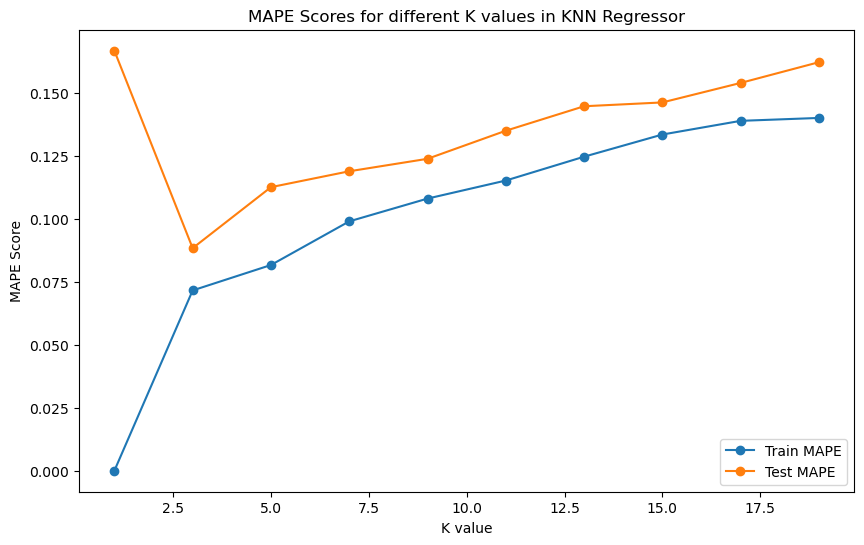

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

Let us take k = 3, as the test and train MAPE Scores are closest at this point.

In [22]:
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 3 is:', error)

RMSE value for k= 3 is: 32.59353285298149


In [23]:
knn_pred = model.predict(X_test)
knn_pred

array([388.        , 145.33333333, 253.        , 441.66666667,
       451.        , 230.33333333, 368.66666667, 274.33333333,
       135.33333333, 190.33333333, 196.        , 374.33333333,
       386.33333333, 376.        , 452.33333333, 398.33333333,
       273.33333333, 146.66666667, 143.        , 136.        ,
       437.        , 226.33333333, 123.66666667, 132.66666667,
       175.33333333, 136.        , 141.        , 193.        ,
       169.        , 427.66666667, 154.33333333, 324.33333333,
       469.        , 373.33333333, 190.33333333, 248.        ,
       320.        , 349.33333333, 355.66666667, 258.33333333,
       165.        , 186.        , 435.66666667, 281.        ])

Now, let's predict the passengers for `year, 2028, month, 8`.

In [24]:
pred=model.predict([[2028, 8]]) 
pred

array([453.])

## Decision Tree Regression

[Text(0.50390625, 0.95, 'Year <= 0.5\nsquared_error = 12755.452\nsamples = 44\nvalue = 265.841'), Text(0.251953125, 0.85, 'Year <= 0.136\nsquared_error = 1938.63\nsamples = 21\nvalue = 165.476'), Text(0.09375, 0.75, 'Month <= 0.136\nsquared_error = 263.61\nsamples = 10\nvalue = 126.7'), Text(0.078125, 0.65, 'squared_error = 0.0\nsamples = 1\nvalue = 170.0'), Text(0.109375, 0.65, 'Month <= 0.455\nsquared_error = 61.432\nsamples = 9\nvalue = 121.889'), Text(0.0625, 0.55, 'Month <= 0.318\nsquared_error = 27.188\nsamples = 4\nvalue = 117.75'), Text(0.03125, 0.45, 'Month <= 0.227\nsquared_error = 16.0\nsamples = 2\nvalue = 122.0'), Text(0.015625, 0.35, 'squared_error = 0.0\nsamples = 1\nvalue = 118.0'), Text(0.046875, 0.35, 'squared_error = 0.0\nsamples = 1\nvalue = 126.0'), Text(0.09375, 0.45, 'Year <= 0.045\nsquared_error = 2.25\nsamples = 2\nvalue = 113.5'), Text(0.078125, 0.35, 'squared_error = 0.0\nsamples = 1\nvalue = 112.0'), Text(0.109375, 0.35, 'squared_error = 0.0\nsamples = 1\nva

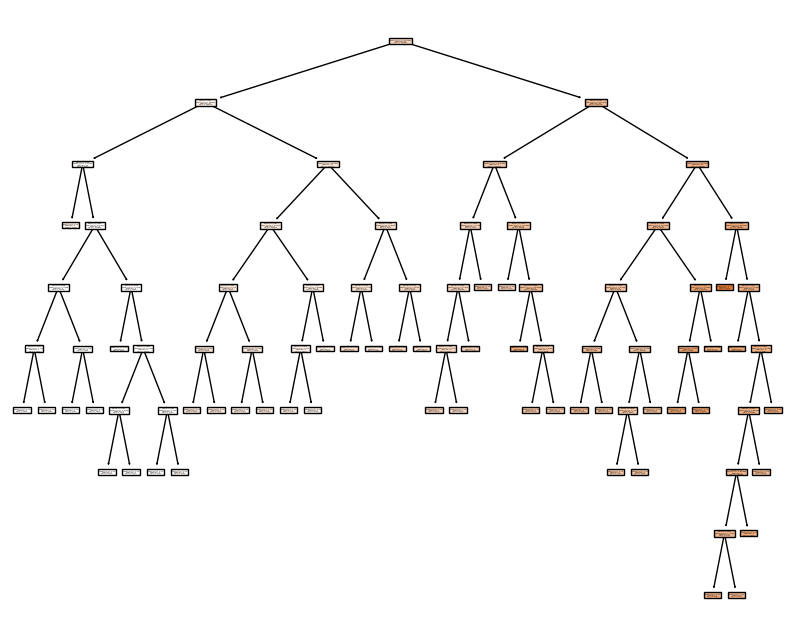

In [29]:
# Create the decision tree regression model
regressor = DecisionTreeRegressor()

# Fit the model to the data
regressor.fit(X_test, y_test)

# Display the decision tree
fig = plt.figure(figsize=(10, 8))
out = tree.plot_tree(regressor, feature_names=['Year', 'Month'], filled=True)
print(out)
plt.show()

In [30]:
pd.DataFrame({'features':['Year', 'Month'], 'importance':regressor.feature_importances_})

,features,importance
0,Year,0.886385
1,Month,0.113615


In [66]:
y_pred = regressor.predict(X_test)
y_pred

array([387.93333333, 126.7       , 200.72727273, 387.93333333,
       387.93333333, 300.375     , 387.93333333, 300.375     ,
       126.7       , 200.72727273, 200.72727273, 300.375     ,
       387.93333333, 387.93333333, 387.93333333, 387.93333333,
       300.375     , 126.7       , 126.7       , 126.7       ,
       387.93333333, 200.72727273, 126.7       , 126.7       ,
       200.72727273, 126.7       , 126.7       , 200.72727273,
       200.72727273, 387.93333333, 126.7       , 300.375     ,
       387.93333333, 387.93333333, 200.72727273, 300.375     ,
       387.93333333, 300.375     , 387.93333333, 200.72727273,
       200.72727273, 200.72727273, 387.93333333, 300.375     ])

In [67]:
# Evaluation (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

In [68]:
mse

1996.842957988981

## Linear Regression

In [69]:
# fit regression model

lm = LinearRegression()

lm = lm.fit(X_train,y_train)

In [70]:
lm.intercept_, lm.coef_

(109.6617997322274, array([363.65051434, -18.11529731]))

In [71]:
lm.score(X_train, y_train)

0.8455017830429621

From the lm.score, we can observe that there is linear dependency between X columns and y, though not too high, so, Linear Regression can be used predict in this dataset.

In [72]:
yhat = lm.predict(X_train)
yhat

array([260.13588118, 359.31329418, 458.49070718,  96.48703805,
       256.84219076,  91.54650242, 471.66546886, 389.07874143,
       232.01727914, 402.25350311, 240.25150519, 124.60564009,
       308.01662573, 405.54719353, 192.37076063, 422.13787909,
       430.37210514, 461.7843976 , 261.78272639, 339.42891819,
       407.19403874, 460.13755239, 198.95814147, 241.8983504 ,
       225.4298983 , 230.37043393,  94.84019284, 337.78207298,
       331.19469214, 473.31231407, 160.95846818, 465.07808802,
       172.48638465, 322.96046609, 327.90100172, 440.2531764 ,
       392.37243185, 190.72391542, 167.54584902, 398.95981269,
       265.07641681, 134.48671135, 108.01495452, 372.48805586,
       370.84121065, 432.01895035, 194.01760584, 228.72358872,
       362.6069846 , 270.01695244, 360.96013939, 306.36978052,
       175.78007507, 341.0757634 , 208.83921273, 304.72293531,
       131.19302093, 326.25415651, 365.90067502, 436.95948598,
       466.72493323, 203.8986771 , 207.19236752, 263.42

In [73]:
lm.intercept_ + lm.coef_ * X_train

,0,1
70,274.957488,94.840193
106,374.134901,94.840193
142,473.312314,94.840193
4,109.661800,96.487038
68,274.957488,91.546502
...,...,...
140,473.312314,91.546502
78,308.016626,101.427574
36,208.839213,103.074419
60,274.957488,103.074419


In [74]:
np.corrcoef(y_train, yhat)**2

array([[1.        , 0.84550178],
       [0.84550178, 1.        ]])

In [75]:
error = y_train - yhat
error

70    -57.135881
106   -54.313294
142   -68.490707
4      24.512962
68      2.157809
         ...    
140    52.802983
78     64.217600
36    -31.251832
60    -64.370107
17     16.160134
Name: passengers, Length: 100, dtype: float64

In [76]:
abs_error = np.abs(error)
mae = np.mean(abs_error) # mean absolute error
mae

37.42739059057269

In [77]:
# calculate mean of absolute percentage error
np.mean(np.abs(error / y_train)) * 100

13.403588035033605

In [78]:
# sum of squares of error
sse = np.sum(error ** 2)

In [79]:
# sum of squares total
sst = np.sum((y_train - y_train.mean())**2)

In [80]:
1- (sse/sst)

0.8455017830429621

In [81]:
# predicting for a new value of X
# say 2020

lm.intercept_ + lm.coef_ * 2020

array([734683.7007616 , -36483.23876503])

In [82]:
# plot the regression line

X_min = X_train.min()
yhat_min = lm.intercept_ + lm.coef_ * X_min
X_max = X_train.max()
yhat_max = lm.intercept_ + lm.coef_ * X_max

In [83]:
# fit statsmodels OLS regression model
X = sm.add_constant(X_train)

In [84]:
X

,const,0,1
70,1.0,0.454545,0.818182
106,1.0,0.727273,0.818182
142,1.0,1.000000,0.818182
4,1.0,0.000000,0.727273
68,1.0,0.454545,1.000000
...,...,...,...
140,1.0,1.000000,1.000000
78,1.0,0.545455,0.454545
36,1.0,0.272727,0.363636
60,1.0,0.454545,0.363636


In [85]:
# Prediction
y_pred = lm.predict(X_test)
y_pred

array([468.37177844, 103.07441889, 271.66379765, 397.31296748,
       470.01862365, 291.54817364, 356.01960376, 336.13522777,
       106.36810931, 235.31096956, 205.54552231, 332.84153735,
       403.90034832, 374.13490107, 400.6066579 , 364.25382981,
       296.48870926, 126.2524853 ,  99.78072847, 137.78040177,
       428.72525993, 223.78305309, 127.89933051,  93.19334763,
       165.89900381, 129.54617572, 141.07409219, 197.31129626,
       162.60531339, 423.7847243 , 136.13355656, 324.6073113 ,
       438.60633119, 425.43156951, 174.13322986, 293.19501885,
       369.19436544, 329.54784693, 367.54752023, 233.66412435,
       159.31162297, 157.66477776, 433.66579556, 289.90132843])

Hence, we can notice that with 84% accuracy, the `number of passengers` of flight have been predicted for the test values.